In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("airbnb.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  float64
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  int64  
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toilets       12805 non-nu

In [4]:
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

In [4]:
df.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078.0,Turkey,1.0,1.0,2.0,0.0,2.0,0.0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665.0,Turkey,2.0,2.0,4.0,0.0,2.0,0.0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991.0,Georgia,1.0,3.0,4.0,0.0,1.0,0.0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339.0,Turkey,1.0,2.0,4.0,0.0,1.0,0.0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673.0,Turkey,1.0,1.0,2.0,0.0,1.0,0.0,After 2 00 pm,12 00 pm


In [5]:
df.isnull().sum()


,0
Unnamed: 0,0
id,0
name,0
rating,0
reviews,1
host_name,8
host_id,0
address,0
features,0
amenities,0


In [19]:
df = df.dropna(subset=['price'])


### checkin, checkout columns seem insignificant, therefore i am not going to use them. As well as, I want to see what the missings values adjacent columns look like starting with host_name.

In [26]:
missing_host_name_rows = df[df['host_name'].isna()]
print(missing_host_name_rows)

       Unnamed: 0        id  \
1249         1249  18295066   
1337         1337  20445002   
1381         1381  48351190   
4277         4277  20006574   
4315         4315  49957198   
4366         4366  49972849   
10645       10645  15724623   
11235       11235  46437570   

                                                    name    rating reviews  \
1249                       Janur Bungalow-Deluxe Limasan  5.000000      13   
1337                 UFO  'Futuro styled Flying Saucer'!  4.750000      28   
1381   Otter Landing on Santa Fe River, 13 private acres  4.950000      73   
4277   Stunning modern 3 bedroom apartment in Netanya...  5.000000       5   
4315                Nile Sunrise Boat for Private Rental  4.920000      13   
4366   Nile Sunrise Sailing from Esna to Aswan Full B...  4.856222       1   
10645     Evening sun - cozy room surrounded by greenery  4.790000     106   
11235         Luxurious 2BR + Full View of Burj Khalifa!  4.580000      45   

      host_name  

In [ ]:
print(df[['price', 'rating', 'reviews', 'bedrooms']].describe())


              price      bedrooms
count  1.280500e+04  12805.000000
mean   1.769780e+04      2.136041
std    4.569364e+04      2.359005
min    3.930000e+02      0.000000
25%    3.994000e+03      1.000000
50%    8.175000e+03      1.000000
75%    1.606200e+04      3.000000
max    1.907963e+06     50.000000


# Correlation analysis of the numeric types

                 id   host_id     price  bathrooms      beds    guests  \
id         1.000000  0.327483  0.009644   0.007477 -0.033437  0.005234   
host_id    0.327483  1.000000 -0.025077  -0.010993 -0.027988 -0.003600   
price      0.009644 -0.025077  1.000000   0.364693  0.233677  0.323393   
bathrooms  0.007477 -0.010993  0.364693   1.000000  0.603499  0.665468   
beds      -0.033437 -0.027988  0.233677   0.603499  1.000000  0.673115   
guests     0.005234 -0.003600  0.323393   0.665468  0.673115  1.000000   
toilets    0.008631  0.003658 -0.011519  -0.125441 -0.041979 -0.069845   
bedrooms  -0.006563 -0.014565  0.339388   0.820780  0.772294  0.713547   
studios   -0.034070 -0.012683 -0.036399  -0.065229 -0.058969 -0.077903   

            toilets  bedrooms   studios  
id         0.008631 -0.006563 -0.034070  
host_id    0.003658 -0.014565 -0.012683  
price     -0.011519  0.339388 -0.036399  
bathrooms -0.125441  0.820780 -0.065229  
beds      -0.041979  0.772294 -0.058969  
guests 

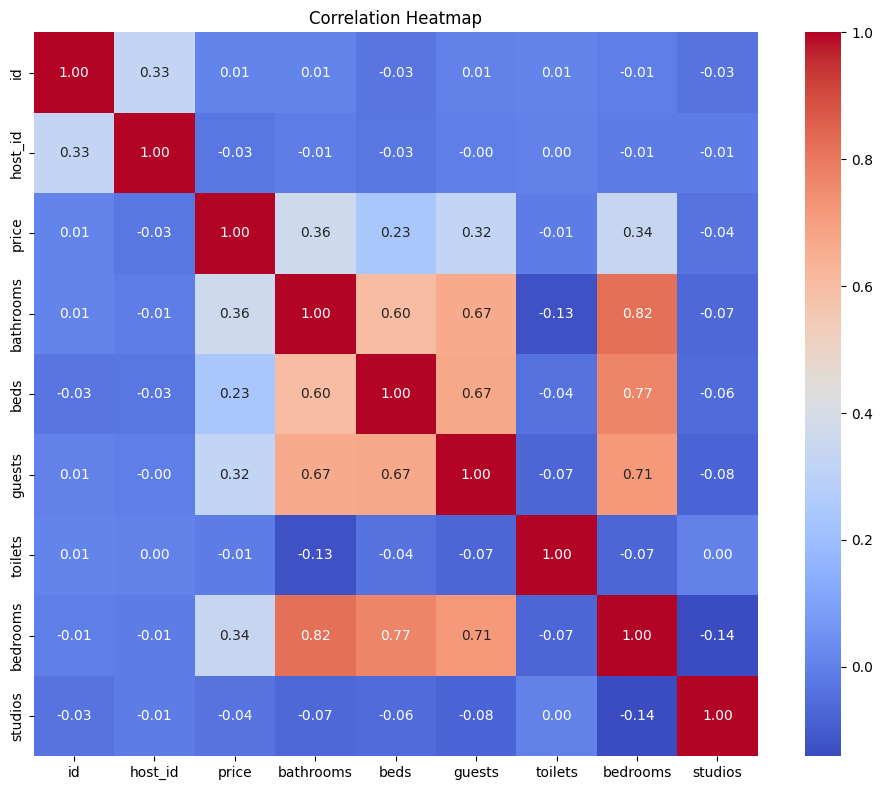

In [6]:
# Select the relevant columns
cols_of_interest = ["id", "host_id", "price", "bathrooms", "beds", "guests", "toilets", "bedrooms", "studios","rating"]
data_subset = df[cols_of_interest]

# Compute the correlation matrix
correlation_matrix = data_subset.corr(numeric_only=True)

# Display correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Categorical Features

In [10]:
categorical_cols = [
    'name', 'rating', 'reviews', 'host_name', 'address',
    'features', 'amenities', 'safety_rules', 'hourse_rules',
    'img_links', 'country', 'checkin', 'checkout'
]

In [20]:
distinct_values = df['rating'].unique()
print(distinct_values)

['4.71' 'New' '4.85' '5.0' '4.67' '4.97' '4.89' '4.83' '4.87' '4.9' '4.75'
 '4.76' '4.84' '4.79' '4.82' '4.93' '4.96' '4.6' '4.64' '4.68' '4.8'
 '4.69' '4.58' '4.63' '4.91' '4.88' '4.94' '4.92' '4.86' '4.78' '4.57'
 '4.99' '4.98' '4.74' '4.7' '4.77' '4.72' '4.73' '4.95' '4.81' '4.53'
 '4.59' '4.62' '4.61' '4.51' '4.54' '4.56' '4.65' '4.55' '4.66' '4.52'
 '4.5' '4.33' '4.26' '3.33' '4.2' '4.0' '4.48' '4.38' '3.0' '4.49' '4.28'
 '4.45' '4.25' '4.36' '4.46' '4.44' '4.43' '3.75' '3.25' '4.13' '4.15'
 '3.88' '4.29' '4.4' '3.5' '4.31']


In [32]:
df['reviews'].unique()

array(['64', '0', '68', '13', '3', '77', '55', '116', '23', '21', '8',
       '52', '17', '61', '49', '38', '4', '15', '26', '5', '2', '85', '9',
       '20', '11', '7', '1', '241', '41', '10', '25', '154', '44', '19',
       '58', '137', '33', '12', '18', '16', '113', '125', '42', '244',
       '27', '188', '34', '69', '97', '6', '86', '114', '65', '91', '32',
       '53', '231', '99', '14', '120', '29', '28', '22', '123', '90',
       '124', '110', '79', '93', '54', '59', '74', '31', '48', '30', '89',
       '92', '35', '24', '229', '40', '102', '39', '194', '100', '147',
       '37', '78', '88', '71', '130', '576', '1,003', '261', '726', '127',
       '76', '84', '36', '60', '192', '46', '135', '62', '159', '158',
       '45', '95', '104', '211', '43', '121', '109', '210', '107', '98',
       '310', '96', '73', '50', '82', '66', '943', '254', '571', '72',
       '51', '246', '136', '165', '67', '807', '262', '548', '266', '181',
       '141', '171', '271', '160', '56', '608', '346',

In [24]:
df['rating'].value_counts()

,count
rating,
4.856222,3791
5.000000,1813
4.670000,251
4.900000,250
4.880000,247
...,...
3.880000,1
4.290000,1
4.400000,1


In [22]:
duplicates = df[df.duplicated(keep='first')]
print(f"Number of duplicate rows: {len(duplicates)}")
duplicates.head()

Number of duplicate rows: 0


,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout,rating_num


# Replace "New" with Average Rating

In [7]:
# First convert all non-"New" ratings to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate mean excluding "New" (which are now NaN)
mean_rating = df['rating'].mean()

# Fill NaN (previously "New") with mean
df['rating'] = df['rating'].fillna(mean_rating)

### The plan is to count the number of amenities separated by "," then, stop counting when it reaches 'Unavailable', then, replacing the row value with the corresponding row value of number of amenities.

In [8]:
def count_amenities(amenity_string):
    if pd.isna(amenity_string):
        return 0
    amenities = amenity_string.split(',')
    count = 0
    for amenity in amenities:
        if 'Unavailable' in amenity:
            break
        count += 1
    return count

# Apply the function to count amenities
df['amenities_count'] = df['amenities'].apply(count_amenities)

# Replace the original amenities column with just the count (if desired)
df['amenities'] = df['amenities_count']

# Optional: Drop the temporary count column
# df.drop('amenities_count', axis=1, inplace=True)

### Using label encoder to transform 'Country' column values to numeric ones

In [9]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'country' column
df['country_encoded'] = label_encoder.fit_transform(df['country'])

# Check the mapping (optional)
country_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Country to Numeric Mapping:", country_mapping)

Country to Numeric Mapping: {' Albania': np.int64(0), ' Argentina': np.int64(1), ' Armenia': np.int64(2), ' Australia': np.int64(3), ' Austria': np.int64(4), ' Azerbaijan': np.int64(5), ' Bahamas': np.int64(6), ' Bangladesh': np.int64(7), ' Belgium': np.int64(8), ' Belize': np.int64(9), ' Bolivia': np.int64(10), ' Bosnia & Herzegovina': np.int64(11), ' Brazil': np.int64(12), ' Brunei': np.int64(13), ' Bulgaria': np.int64(14), ' Cambodia': np.int64(15), ' Canada': np.int64(16), ' Cayman Islands': np.int64(17), ' Chile': np.int64(18), ' Colombia': np.int64(19), ' Congo': np.int64(20), ' Costa Rica': np.int64(21), ' Croatia': np.int64(22), ' Cuba': np.int64(23), ' Cyprus': np.int64(24), ' Czechia': np.int64(25), ' Denmark': np.int64(26), ' Egypt': np.int64(27), ' Estonia': np.int64(28), ' Fiji': np.int64(29), ' Finland': np.int64(30), ' France': np.int64(31), ' French Polynesia': np.int64(32), ' Georgia': np.int64(33), ' Germany': np.int64(34), ' Greece': np.int64(35), ' Greenland': np.in

### Load & Prepare Data

### ANN Model

### Model Training

### Plot Training Progress

### Evaluate the Model

### Predict on the test data

### Calculate Metrics

### After FIX

In [10]:


# 1. Feature Selection
X = df[['rating', 'reviews', 'amenities', 'country_encoded', 'bathrooms',
        'beds', 'guests', 'toilets', 'bedrooms', 'studios']]
y = df['price']

# 2. Handle NaN and Inf Values
X = np.nan_to_num(X, nan=0.0, posinf=np.nanmax(X.values), neginf=np.nanmin(X.values))
y = np.nan_to_num(y, nan=np.nanmean(y), posinf=np.nanmax(y), neginf=np.nanmin(y))

# 3. Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scaling Features and Target
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

# 5. Model Architecture
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    Dense(1)
])

# 6. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=0.001, clipnorm=1.0),
    loss=Huber(),  # ✅ Correct loss usage
    metrics=['mae']
)

# 7. Train the Model with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled,
    y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 8. Evaluate the Model
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

print("\nEvaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Epoch 1/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2295 - mae: 0.4794 - val_loss: 0.1287 - val_mae: 0.2946
Epoch 2/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1250 - mae: 0.3063 - val_loss: 0.1178 - val_mae: 0.2696
Epoch 3/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1256 - mae: 0.2939 - val_loss: 0.1179 - val_mae: 0.2748
Epoch 4/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1167 - mae: 0.2832 - val_loss: 0.1184 - val_mae: 0.2671
Epoch 5/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1213 - mae: 0.2787 - val_loss: 0.1149 - val_mae: 0.2629
Epoch 6/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1238 - mae: 0.2822 - val_loss: 0.1155 - val_mae: 0.2681
Epoch 7/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1074 - mae: 0.2624 - val_loss: 0.1147 - val_mae: 0.2576
Epoch 8/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1157 - mae: 0.2696 - val_loss: 0.1153 - val_mae: 0.2706
Epoch 9/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

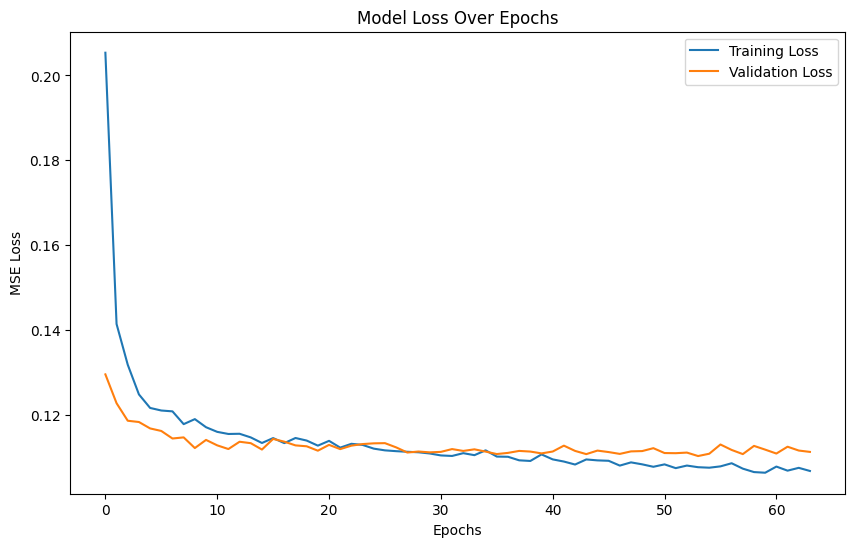

In [18]:

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

### Cross validation

In [11]:
from sklearn.model_selection import KFold, cross_val_predict
from xgboost import XGBRegressor
import warnings

In [12]:
warnings.filterwarnings('ignore')


In [13]:
# 1. Feature Engineering
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')
df['amenities_count'] = df['amenities'].apply(lambda x: len(str(x).split(',')))

# Drop rows with null target or essential features
df = df.dropna(subset=['price', 'rating', 'reviews', 'bathrooms', 'beds', 'guests', 'toilets', 'bedrooms', 'studios'])

# 2. Log-transform the target (price)
df['log_price'] = np.log1p(df['price'])

# 3. Feature Selection
features = ['rating', 'reviews', 'amenities_count', 'country_encoded',
            'bathrooms', 'beds', 'guests', 'toilets', 'bedrooms', 'studios']
X = df[features].copy()
y = df['log_price'].copy()

# 4. Handle NaNs/infs in X
X = X.fillna(0)
X.replace([np.inf, -np.inf], 0, inplace=True)

# 5. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Cross-Validation Setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# 7. Cross-Validated Predictions
y_pred_log = cross_val_predict(model, X_scaled, y, cv=kf)

# 8. Inverse log-transform the predictions
y_actual = np.expm1(y)
y_pred = np.expm1(y_pred_log)

# 9. Evaluation Metrics
print("\nCross-Validated Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_actual, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_actual, y_pred)))
print("R2 Score:", r2_score(y_actual, y_pred))


Cross-Validated Evaluation Metrics:
MAE: 9651.27054584745
RMSE: 38368.93597018025
R2 Score: 0.2948995673608502


### MAE dropped from ~11,747 → ~9,651

### R² Score improved from ~0.17 → ~0.29

### Hyperparameter Tuning using XGBoost + RandomizedSearchCV

In [14]:
from sklearn.model_selection import RandomizedSearchCV


In [15]:
# 1. Prepare Data (reuse from previous step)
X = df[['rating', 'reviews', 'amenities_count', 'country_encoded', 'bathrooms',
        'beds', 'guests', 'toilets', 'bedrooms', 'studios']]
y = np.log1p(df['price'])  # Log-transform target

# Fill missing values and scale
X.fillna(0, inplace=True)
X.replace([np.inf, -np.inf], 0, inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Define XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# 3. Define Hyperparameter Grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# 4. RandomizedSearchCV Setup
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Reduce or increase for speed/coverage
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 5. Fit the Search
random_search.fit(X_scaled, y)

# 6. Best Estimator Evaluation
best_model = random_search.best_estimator_
y_pred_log = best_model.predict(X_scaled)
y_pred = np.expm1(y_pred_log)  # Inverse log transform
y_actual = df['price'].values

# 7. Evaluation
print("\nBest Parameters Found:")
print(random_search.best_params_)

print("\nEvaluation on Full Data:")
print("MAE:", mean_absolute_error(y_actual, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_actual, y_pred)))
print("R2 Score:", r2_score(y_actual, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters Found:
{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}

Evaluation on Full Data:
MAE: 8591.015625
RMSE: 35218.15350071608
R2 Score: 0.405947744846344


| Stage                     | MAE       | RMSE       | R² Score  |
| ------------------------- | --------- | ---------- | --------- |
| Baseline (No CV)          | 11,747   | 37854     | 0.17   |
| Cross-Validation (before) | 9,651     | 38,369     | 0.295     |
| **After Tuning**       | **8,591** | **35,218** | **0.406** |



*   ### Model now explains over 40% of the variance in prices — a substantial leap.
*   ### MAE dropped by ~26% compared to the baseline.





